In [24]:
import pandas as pd
import numpy as np
import ast
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [25]:
catalog_df = pd.read_csv('drive/MyDrive/collab_files/product_catalog.csv')
category_map_df = pd.read_csv("/content/drive/MyDrive/collab_files/product_category_map.csv")
transactions_df= pd.read_csv("drive/MyDrive/collab_files/transactions.csv")
test_df= pd.read_csv("drive/MyDrive/collab_files/test.csv")

In [26]:
print("Shape of catalog_df:", catalog_df.shape)
print("Shape of category_map_df:", category_map_df.shape)
print("Shape of transactions_df:", transactions_df.shape)
print("Shape of test_df:", test_df.shape)


Shape of catalog_df: (32776, 8)
Shape of category_map_df: (4332, 2)
Shape of transactions_df: (1071538, 4)
Shape of test_df: (10000, 4)


# **EXPLORATARY DATA ANAYLSIS**

In [27]:
catalog_df.head()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [28]:
category_map_df.head()

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [29]:
transactions_df.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [30]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       32776 non-null  int64 
 1   manufacturer_id  32776 non-null  int64 
 2   attribute_1      32776 non-null  int64 
 3   attribute_2      32776 non-null  int64 
 4   attribute_3      32776 non-null  int64 
 5   attribute_4      32776 non-null  int64 
 6   attribute_5      32776 non-null  int64 
 7   categories       25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB


**attributes of category data frame**

In [31]:
# -1 values in attributes in catalog_df
for i in range(1,6):
  str1 = 'attribute_'+ str(i)
  print(f"{str1} : {catalog_df[catalog_df[str1]==-1]['product_id'].count()}")

attribute_1 : 4
attribute_2 : 0
attribute_3 : 466
attribute_4 : 617
attribute_5 : 4264


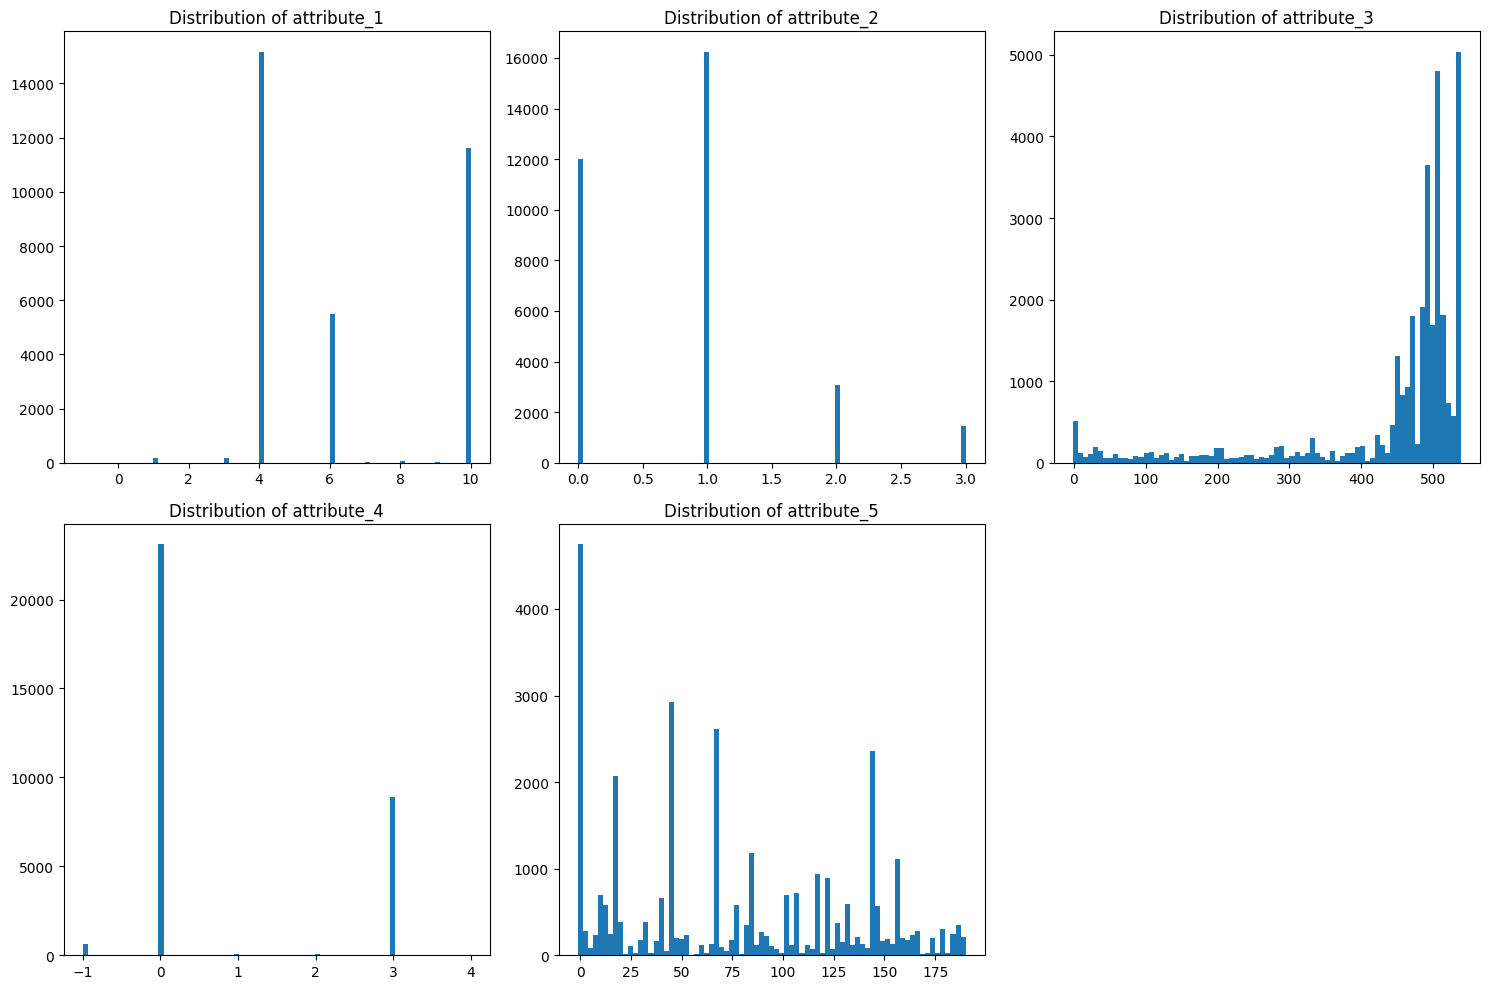

In [32]:
# List of attributes to plot
attributes = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histogram for each attribute
for i, attribute in enumerate(attributes):
    axes[i].hist(catalog_df[attribute], bins=77)
    axes[i].set_title(f'Distribution of {attribute}')

# Remove empty subplot (since we have 5 attributes)
fig.delaxes(axes[5])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Filling -1 values with mode

In [33]:
for i in range(1,5):
  str1 = 'attribute_'+ str(i)
  catalog_df[str1] = catalog_df[str1].replace(-1, catalog_df[str1].mode()[0])

Percentages of column values

In [34]:
for i, attribute in enumerate(attributes):
  print(catalog_df[attribute].value_counts(dropna=False, normalize=True).head())
  print()

attribute_1
4     0.462778
10    0.354253
6     0.167684
1     0.005827
3     0.005431
Name: proportion, dtype: float64

attribute_2
1    0.495423
0    0.365694
2    0.094124
3    0.044758
Name: proportion, dtype: float64

attribute_3
536    0.135160
503    0.091988
491    0.085398
487    0.027154
474    0.024652
Name: proportion, dtype: float64

attribute_4
0    0.723609
3    0.271693
2    0.002502
1    0.001770
4    0.000427
Name: proportion, dtype: float64

attribute_5
-1      0.130095
 66     0.077984
 144    0.071394
 17     0.063125
 46     0.041646
Name: proportion, dtype: float64



Category filling nans

In [35]:
# Step 1: Calculate the mode for each group
mode_values = catalog_df.groupby(['attribute_1', 'attribute_2','attribute_3'])['categories'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else None)

# Step 2: Map the mode values back to the original DataFrame
catalog_df['mode_fill'] = catalog_df.set_index(['attribute_1', 'attribute_2','attribute_3']).index.map(mode_values)

# Step 3: Fill NaN values in 'categories' with the corresponding mode values
catalog_df['categories'].fillna(catalog_df['mode_fill'], inplace=True)

# Drop the temporary 'mode_fill' column if no longer needed
catalog_df.drop(columns=['mode_fill'], inplace=True)
catalog_df['categories'].fillna(catalog_df['categories'].mode()[0],inplace=True)

In [36]:
catalog_df['categories'] = catalog_df['categories'].astype(str)

In [38]:
catalog_df.head()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,[2834]
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


### Category dataframe

In [41]:
# Dropping the duplicates for simplicity
category_map_df = category_map_df.drop_duplicates(subset=['category_id'])
category_map_df[category_map_df['category_id'].duplicated(keep=False)]

,category_id,parent_category_id


In [42]:
# Only category that its parent equal to itself
category_map_df[category_map_df['category_id']==category_map_df['parent_category_id']]['category_id'].values

array([3898])

In [43]:
def category_mapper(df):
    # Step 1: Identify top-level categories (where category_id equals parent_category_id)
    top_nodes = df[df['category_id'] == df['parent_category_id']]['category_id'].values

    # Step 2: Create a copy of the input DataFrame to avoid modifying the original
    category_map_df_filtered = df.copy()

    # Step 3: Update parent_category_id for categories that are children of top-level categories
    # For rows where parent_category_id is in the list of top-level categories,
    # set parent_category_id to be the same as category_id so they become top category
    category_map_df_filtered.loc[category_map_df_filtered['parent_category_id'].isin(top_nodes), 'parent_category_id'] = category_map_df_filtered['category_id']

    # Step 4: Find categories where category_id equals parent_category_id after the update
    # These are categories that are now "self-referencing" (i.e., a category that is its own parent)
    parent_list = category_map_df_filtered[category_map_df_filtered['category_id'] == category_map_df_filtered['parent_category_id']]['category_id'].values

    # Step 5: Filter the parent_list to include only those category_ids that are <= 3898
    # Heuristically categories above 3898 is not counted as parent
    parent_list = [x for x in parent_list if x <= 3898]

    # Step 6: Return the modified DataFrame and the filtered list of parent category IDs
    return category_map_df_filtered, parent_list

In [44]:
# Converting category column to list
catalog_df['categories'] = catalog_df['categories'].apply(ast.literal_eval)
catalog_df['categories'] = catalog_df['categories'].apply(lambda x: sorted(x))
catalog_df.loc[0,'categories']

[855, 2890, 3908, 3909]

In [48]:
def category_row_transform(row, df_map, parents):
    category = row['categories']
    element_list = []
    for element in category:
      while element not in parents:
          element = df_map.loc[df_map['category_id'] == element, 'parent_category_id'].values[0]
      element_list.append(element)
    category = list(set(element_list))
    row['categories'] = category
    return row


In [49]:
category_map_df_filtered, parent_list = category_mapper(category_map_df)

Arranging the category mapping dataframe

In [50]:
category_map_df_filtered.loc[category_map_df_filtered['parent_category_id'] >= 3898, 'parent_category_id'] = 3898
category_map_df_filtered = category_map_df_filtered.drop_duplicates(subset=['category_id', 'parent_category_id'])

Transforming the category column

In [51]:
catalog_df_transformed = catalog_df.apply(lambda row: category_row_transform(row,category_map_df_filtered,parent_list),axis=1)